# День 12 – Введение в анализ данных
SQL + Pandas + визуализация данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

#Task 6: Ящик с усами
Помните, как мы пытались выяснить, влияет ли посещение ленты новостей на поведение пользователей из тестовой и контрольной групп? В прошлый раз мы просто рассчитывали средние значения. Но знаем ли мы о дисперсиях? Что, если они тоже изменились? Что, если возникли аномальные значения? Чтобы ответить на эти вопросы, нужно построить "ящик с усами" или boxplot.
Выполните необходимые шаги по созданию следующего графика:
 
1.	Используйте данные из файла ab-test.csv, считайте их в датафрейм и внесите любые изменения, которые, по вашему мнению, помогут решить задачу.
2.	Размер figsize остается прежним (15,8), размер шрифта можно выбрать по своему вкусу.
3.	Цветовая палитра должна быть такой же, как в примере.
4.	Размер шрифта заголовка — 15.
5.	Ширина линий ящиков — 3, ширина линий медианы — 2.
6.	В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Каким было значение IQR контрольной группы до посещения новостной ленты?». В своем ответе укажите приблизительное значение, которое можно получить, просто посмотрев на график, и округлите его до ближайшего целого, кратного 10.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('../content/drive/MyDrive/School21/day12/data/ab-test.csv')
df.head

<bound method NDFrame.head of         uid        diff    time    group
0    user_1 -103.333333   after     test
1    user_1   -6.000000  before     test
2   user_18  -10.000000   after     test
3   user_18   -3.500000  before     test
4   user_19  -82.333333   after     test
5   user_19 -148.000000  before     test
6   user_21  -78.500000   after     test
7   user_21 -112.500000  before     test
8   user_25 -127.500000   after     test
9   user_25  -69.333333  before     test
10  user_28 -136.500000   after     test
11  user_28  -53.000000  before     test
12   user_3 -158.500000   after     test
13   user_3  -70.000000  before     test
14  user_12  -75.000000   after  control
15  user_12 -103.000000  before  control
16  user_13  -81.500000   after  control
17  user_13  -15.500000  before  control
18  user_15  -32.000000   after  control
19  user_15   -3.000000  before  control
20  user_16   17.500000   after  control
21  user_16 -153.000000  before  control
22   user_2  -94.000000   a

In [ ]:
df_after = df[df.time=='after']
df_after.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
2,user_18,-10.000000,after,test
4,user_19,-82.333333,after,test
6,user_21,-78.500000,after,test
8,user_25,-127.500000,after,test


In [ ]:
df_before = df[df.time=='before']
df_after.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
2,user_18,-10.000000,after,test
4,user_19,-82.333333,after,test
6,user_21,-78.500000,after,test
8,user_25,-127.500000,after,test


In [ ]:
df_final = df_after.rename(columns={'diff': 'after'})
df_final

,uid,after,time,group
0,user_1,-103.333333,after,test
2,user_18,-10.000000,after,test
4,user_19,-82.333333,after,test
6,user_21,-78.500000,after,test
8,user_25,-127.500000,after,test
10,user_28,-136.500000,after,test
12,user_3,-158.500000,after,test
14,user_12,-75.000000,after,control
16,user_13,-81.500000,after,control
18,user_15,-32.000000,after,control


In [ ]:
df_final['before'] = list(df_before['diff'])
df_final

,uid,after,time,group,before
0,user_1,-103.333333,after,test,-6.000000
2,user_18,-10.000000,after,test,-3.500000
4,user_19,-82.333333,after,test,-148.000000
6,user_21,-78.500000,after,test,-112.500000
8,user_25,-127.500000,after,test,-69.333333
10,user_28,-136.500000,after,test,-53.000000
12,user_3,-158.500000,after,test,-70.000000
14,user_12,-75.000000,after,control,-103.000000
16,user_13,-81.500000,after,control,-15.500000
18,user_15,-32.000000,after,control,-3.000000


In [ ]:
df_plot = df_final[['after', 'before', 'group']]
df_plot

,after,before,group
0,-103.333333,-6.000000,test
2,-10.000000,-3.500000,test
4,-82.333333,-148.000000,test
6,-78.500000,-112.500000,test
8,-127.500000,-69.333333,test
10,-136.500000,-53.000000,test
12,-158.500000,-70.000000,test
14,-75.000000,-103.000000,control
16,-81.500000,-15.500000,control
18,-32.000000,-3.000000,control


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


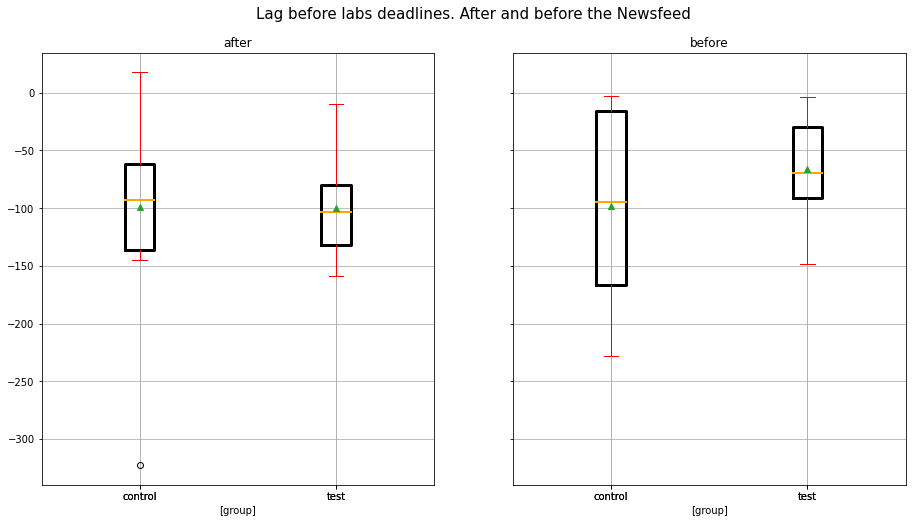

In [ ]:
df_plot.boxplot(
                by='group',
                figsize=(15,8),
                showmeans=True,
                medianprops=dict(linewidth=2, color='orange'),
                boxprops=dict(linewidth=3, color='black'),
                whiskerprops=dict(color='red'),
                capprops=dict(color='red')
)
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', size=15)
plt.show()

In [ ]:
#@markdown **Каким было значение IQR контрольной группы до посещения новостной ленты?**

Ответ: приблизительно 150